In [14]:
a#Importing the Libraries
import os
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mandates
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [15]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras import backend as K
import time
from sklearn.preprocessing import StandardScaler

In [3]:
stdsc = StandardScaler()

In [16]:
dateparse = lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')
df = pd.read_csv("C:/Users/KIIT/Research_6th_sem/YESBANK.NS.csv",sep=',', index_col='Date', parse_dates=['Date'],date_parser=dateparse).fillna(0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-24,43.650002,43.700001,34.549999,35.00,35.00,79655385
2020-03-25,35.299999,35.500000,28.500000,29.60,29.60,95151977
2020-03-26,29.350000,31.000000,25.200001,26.60,26.60,119555918
2020-03-27,29.049999,33.250000,26.000000,26.35,26.35,118571420
2020-03-30,27.650000,27.700001,24.549999,24.90,24.90,54980358


In [17]:
print(df.isnull().sum())
df = df.apply (pd.to_numeric, errors='coerce')
df.drop(df[df['Close'] < 1].index, inplace = True)
df

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-24,43.650002,43.700001,34.549999,35.00,35.00,79655385
2020-03-25,35.299999,35.500000,28.500000,29.60,29.60,95151977
2020-03-26,29.350000,31.000000,25.200001,26.60,26.60,119555918
2020-03-27,29.049999,33.250000,26.000000,26.35,26.35,118571420
2020-03-30,27.650000,27.700001,24.549999,24.90,24.90,54980358
...,...,...,...,...,...,...
2023-03-17,15.000000,15.850000,14.500000,15.05,15.05,445464706
2023-03-20,15.400000,15.500000,15.000000,15.35,15.35,297633356
2023-03-21,15.450000,15.550000,15.150000,15.25,15.25,185863476


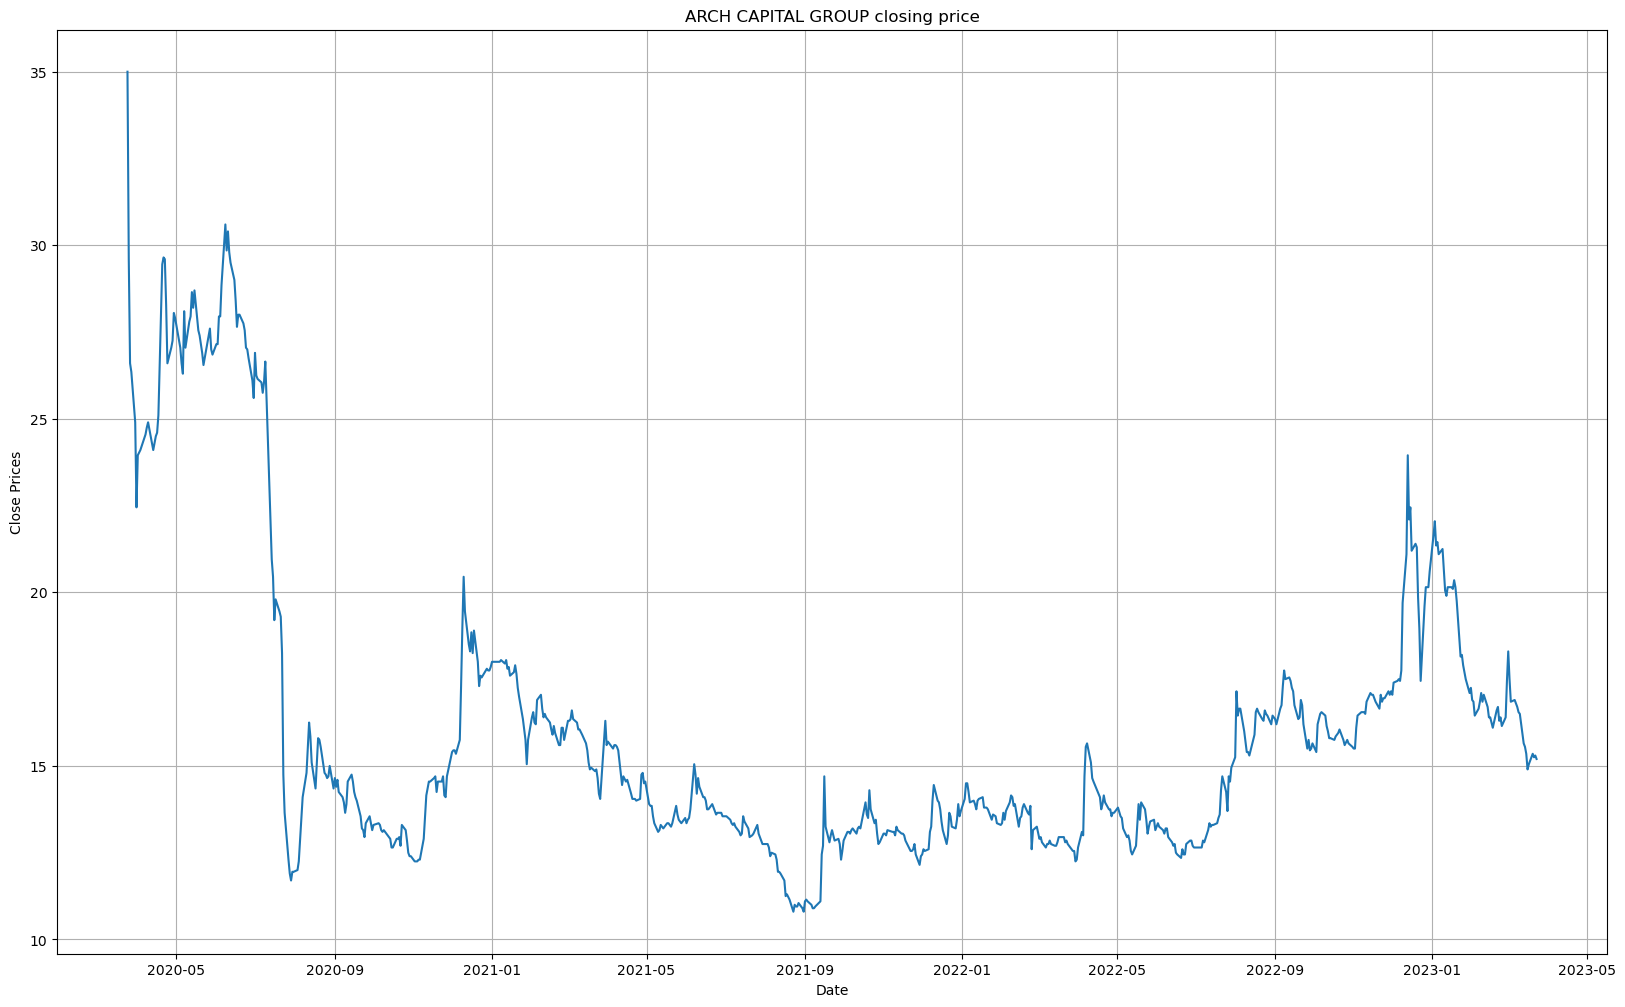

In [18]:
plt.figure(figsize=(20,12))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

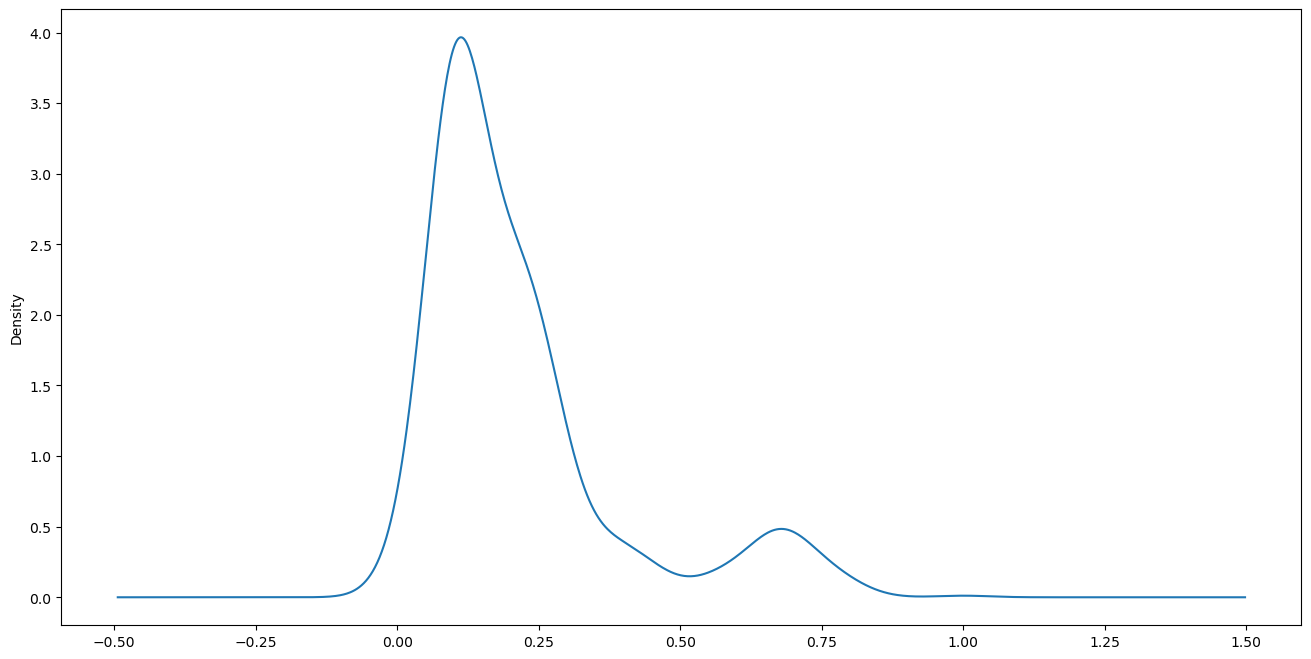

In [19]:
MAX_VALUE=df['Close'].max()
MIN_VALUE=df['Close'].min()
df['Close']=(df['Close']-df['Close'].min())/(df['Close'].max()-df['Close'].min())

df_close=df['Close']
df_close.drop(df_close[df_close == 0].index, inplace = True)
df_close.plot(kind='kde')

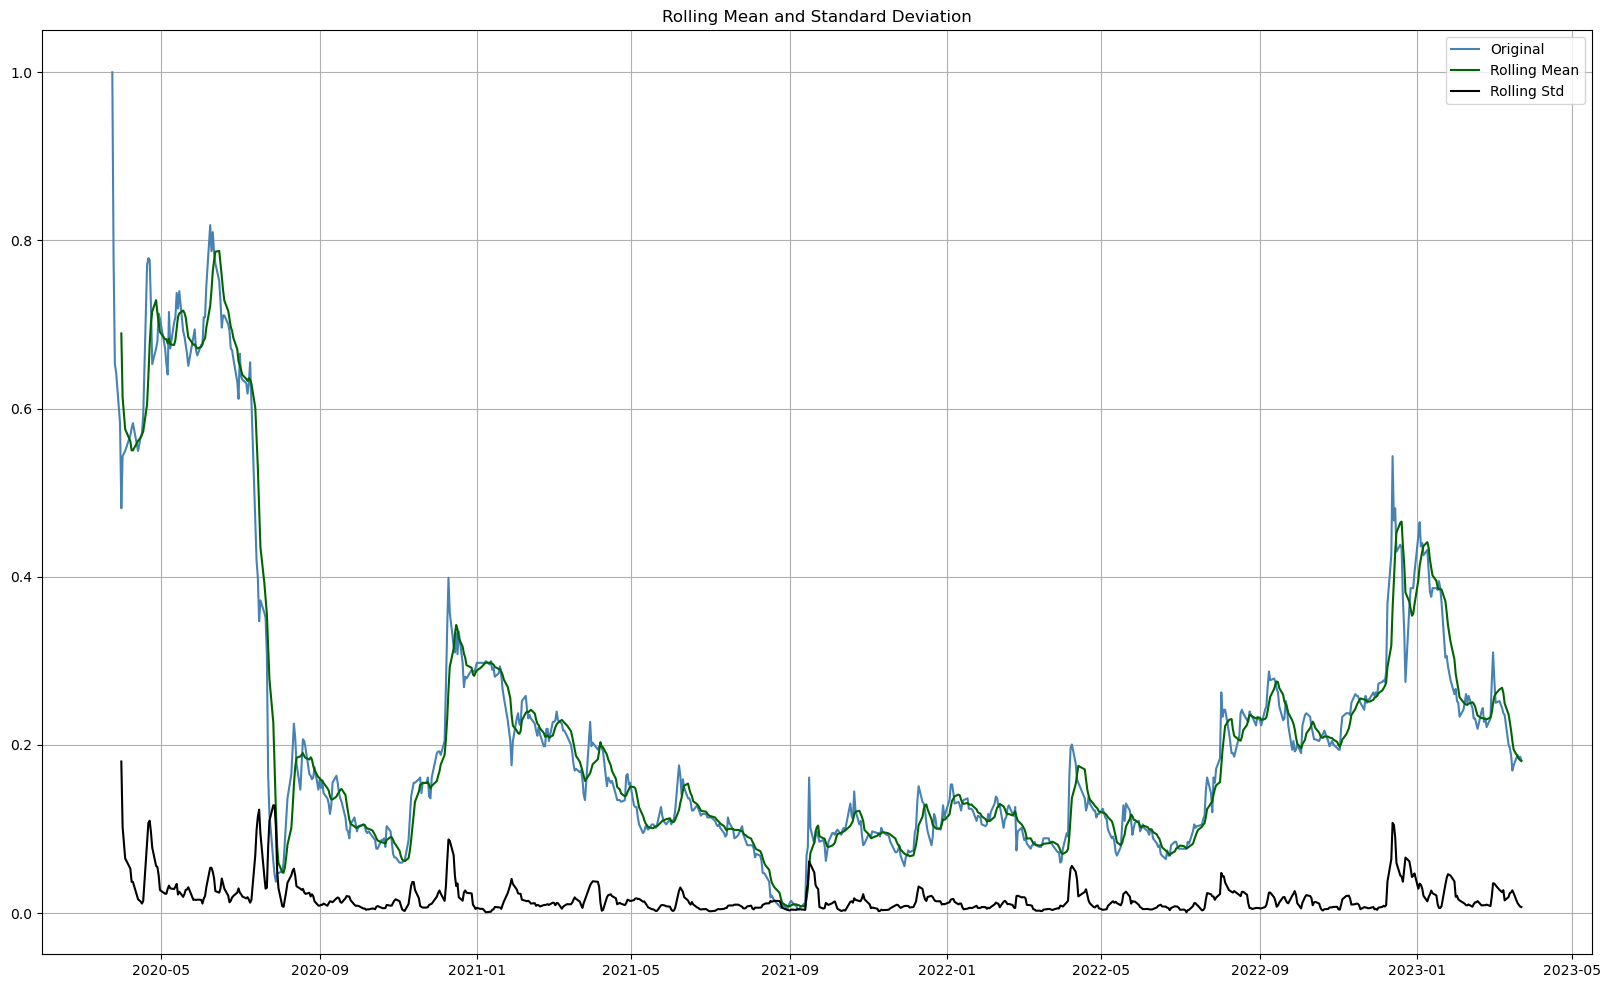

Results of dickey fuller test
Test Statistics                 -2.810365
p-value                          0.056808
No. of lags used                 3.000000
Number of observations used    741.000000
critical value (1%)             -3.439206
critical value (5%)             -2.865448
critical value (10%)            -2.568851
dtype: float64


In [20]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(6).mean()
    rolstd = timeseries.rolling(6).std()
    #Plot rolling statistics:
    plt.figure(figsize=(20,12))
    plt.grid(True)
    plt.plot(timeseries, color='steelblue',label='Original')
    plt.plot(rolmean, color='darkgreen', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 1600x800 with 0 Axes>

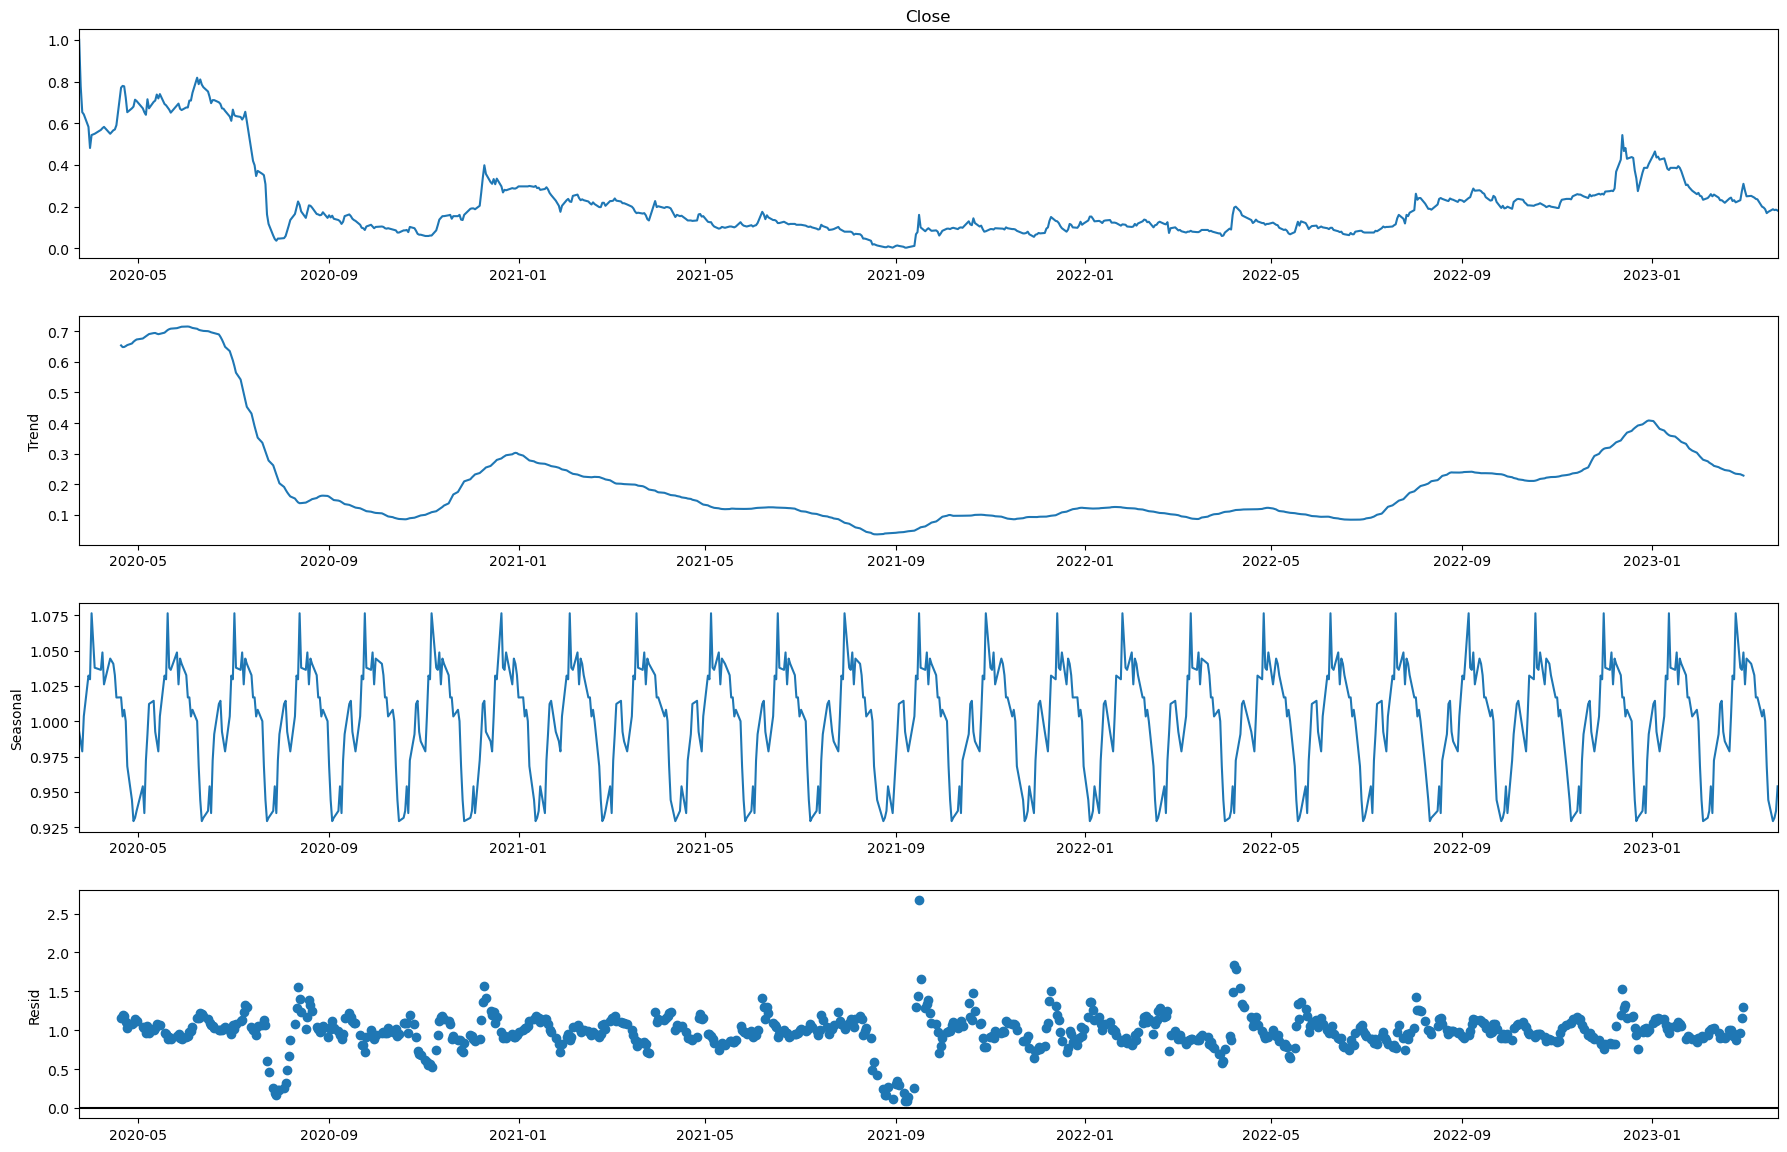

In [21]:
seperate = seasonal_decompose(df_close, model='multiplicative',period=30)
diagram=plt.figure()
diagram=seperate.plot()
diagram.set_size_inches(18,12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


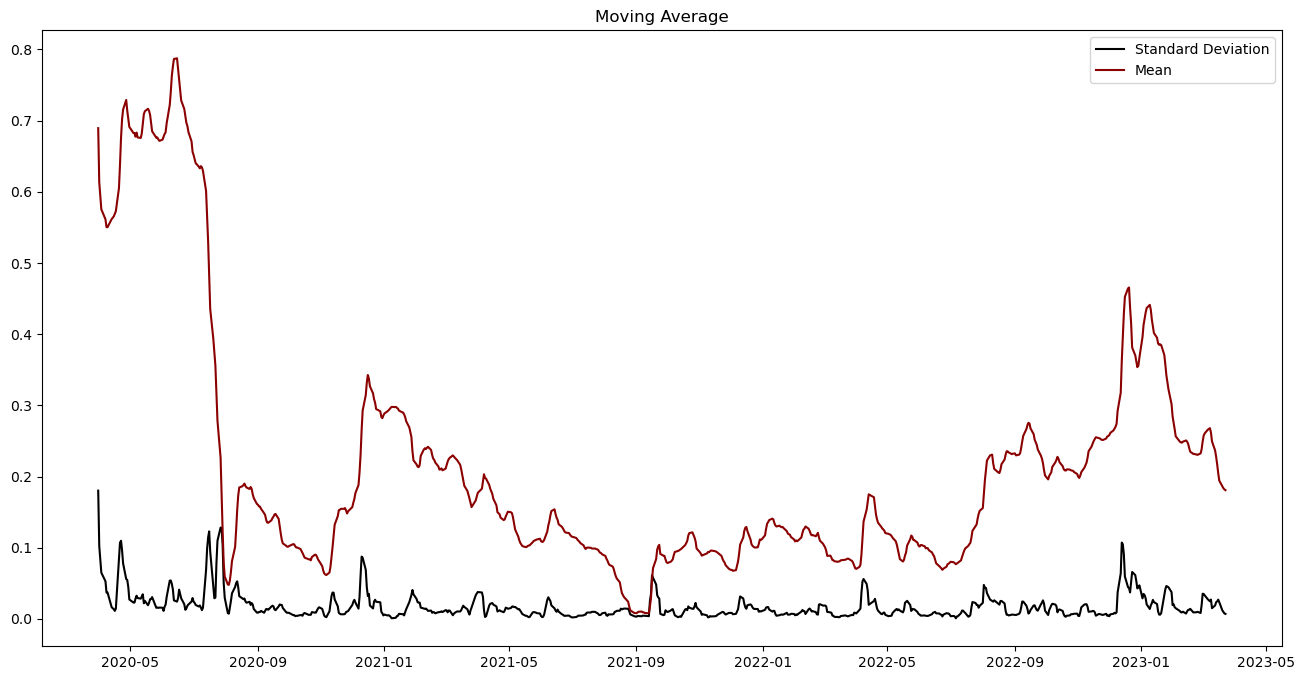

In [22]:
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
df_log = df_close
moving_avg = df_log.rolling(6).mean()
std_dev = df_log.rolling(6).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="darkred", label = "Mean")
plt.legend()
plt.show()

In [23]:
train_data, test_data = df_log[:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
print(train_data,train_data.shape)
print(test_data,test_data.shape)

Date
2020-03-24    1.000000
2020-03-25    0.776860
2020-03-26    0.652893
2020-03-27    0.642562
2020-03-30    0.582645
                ...   
2022-08-11    0.190083
2022-08-12    0.185950
2022-08-16    0.210744
2022-08-17    0.237603
2022-08-18    0.241736
Name: Close, Length: 596, dtype: float64 (596,)
Date
2022-08-19    0.237603
2022-08-22    0.229339
2022-08-23    0.227273
2022-08-24    0.239669
2022-08-25    0.235537
                ...   
2023-03-17    0.175620
2023-03-20    0.188017
2023-03-21    0.183884
2023-03-22    0.185950
2023-03-23    0.181818
Name: Close, Length: 149, dtype: float64 (149,)


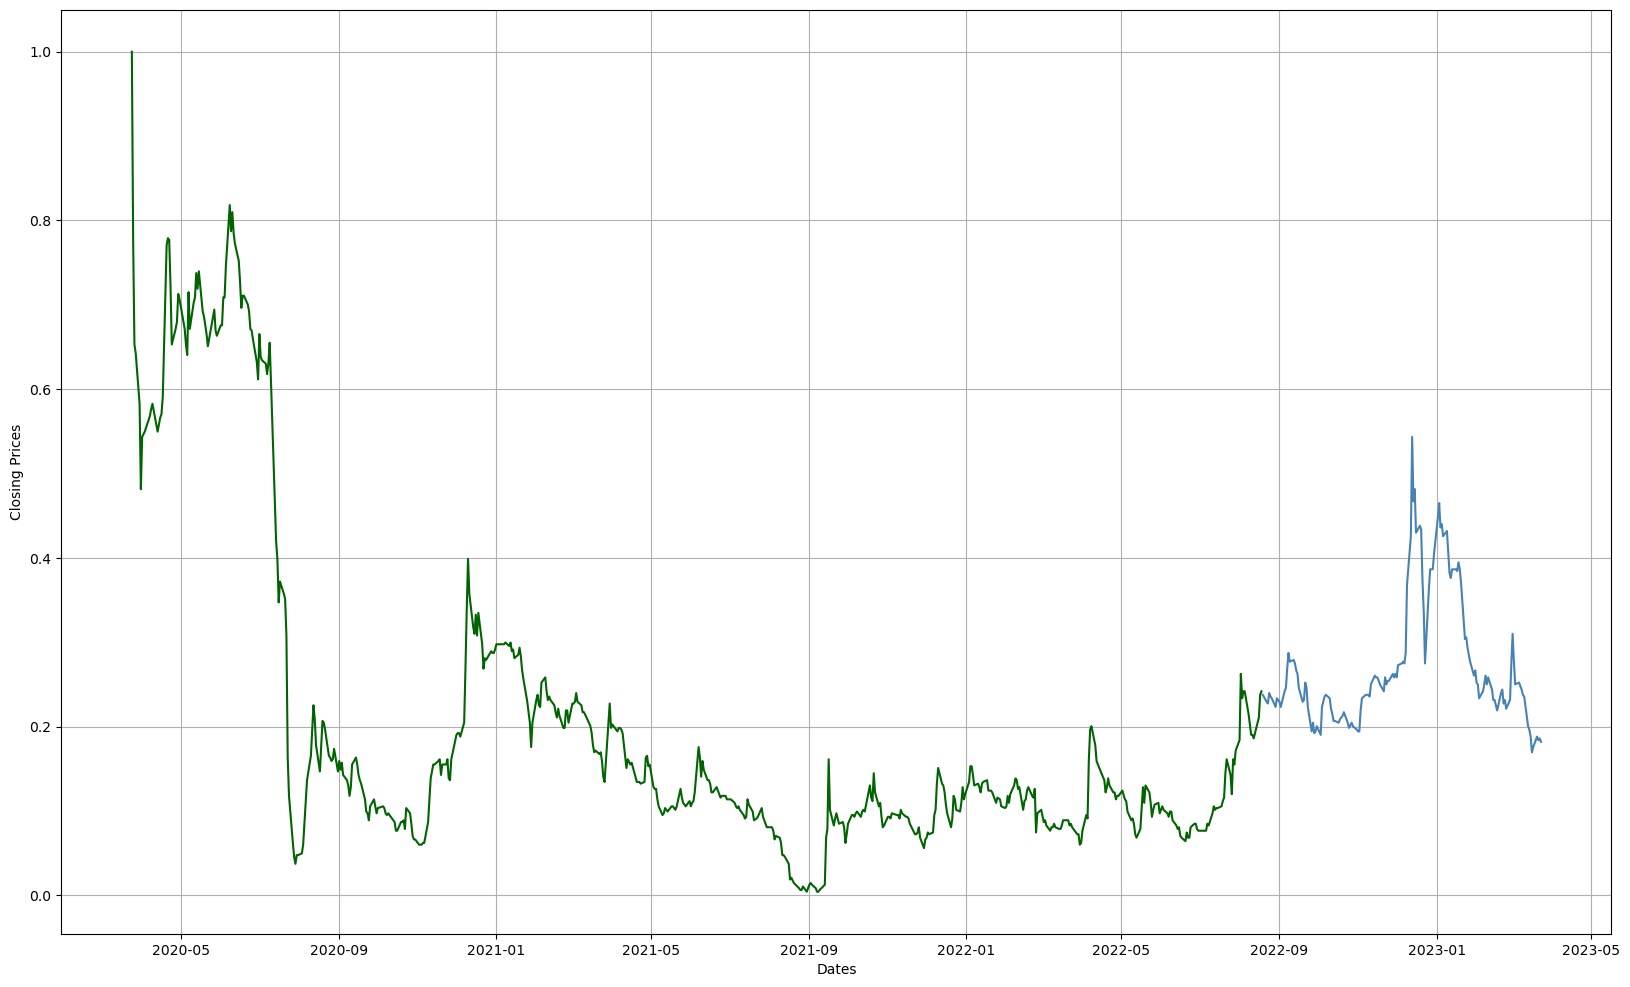

In [24]:
plt.figure(figsize=(20,12))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'darkgreen', label='Train data')
plt.plot(test_data, 'steelblue', label='Test data')
#plt.legend()

In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [29]:
# Build BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam',metrics ='accuracy' )

In [30]:
# Train BiLSTM model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/1000
19/19 [==============================] - 22s 210ms/step - loss: 33580558286061568.0000 - accuracy: 0.0000e+00 - val_loss: 37168569670172672.0000 - val_accuracy: 0.0000e+00
Epoch 2/1000
19/19 [==============================] - 0s 21ms/step - loss: 33580558286061568.0000 - accuracy: 0.0000e+00 - val_loss: 37168569670172672.0000 - val_accuracy: 0.0000e+00
Epoch 3/1000
19/19 [==============================] - 0s 21ms/step - loss: 33580553991094272.0000 - accuracy: 0.0000e+00 - val_loss: 37168565375205376.0000 - val_accuracy: 0.0000e+00
Epoch 4/1000
19/19 [==============================] - 0s 24ms/step - loss: 33580553991094272.0000 - accuracy: 0.0000e+00 - val_loss: 37168565375205376.0000 - val_accuracy: 0.0000e+00
Epoch 5/1000
19/19 [==============================] - 0s 26ms/step - loss: 33580551843610624.0000 - accuracy: 0.0000e+00 - val_loss: 37168565375205376.0000 - val_accuracy: 0.0000e+00
Epoch 6/1000
19/19 [==============================] - 1s 29ms/step - loss: 33580551

19/19 [==============================] - 1s 38ms/step - loss: 33580491714068480.0000 - accuracy: 0.0000e+00 - val_loss: 37168513835597824.0000 - val_accuracy: 0.0000e+00
Epoch 90/1000
19/19 [==============================] - 1s 32ms/step - loss: 33580496009035776.0000 - accuracy: 0.0000e+00 - val_loss: 37168513835597824.0000 - val_accuracy: 0.0000e+00
Epoch 91/1000
19/19 [==============================] - 1s 31ms/step - loss: 33580491714068480.0000 - accuracy: 0.0000e+00 - val_loss: 37168509540630528.0000 - val_accuracy: 0.0000e+00
Epoch 92/1000
19/19 [==============================] - 1s 32ms/step - loss: 33580491714068480.0000 - accuracy: 0.0000e+00 - val_loss: 37168509540630528.0000 - val_accuracy: 0.0000e+00
Epoch 93/1000
19/19 [==============================] - 1s 40ms/step - loss: 33580491714068480.0000 - accuracy: 0.0000e+00 - val_loss: 37168505245663232.0000 - val_accuracy: 0.0000e+00
Epoch 94/1000
19/19 [==============================] - 1s 40ms/step - loss: 33580491714068480.

19/19 [==============================] - 1s 31ms/step - loss: 33580440174460928.0000 - accuracy: 0.0000e+00 - val_loss: 37168458001022976.0000 - val_accuracy: 0.0000e+00
Epoch 178/1000
19/19 [==============================] - 1s 36ms/step - loss: 33580440174460928.0000 - accuracy: 0.0000e+00 - val_loss: 37168458001022976.0000 - val_accuracy: 0.0000e+00
Epoch 179/1000
19/19 [==============================] - 1s 39ms/step - loss: 33580435879493632.0000 - accuracy: 0.0000e+00 - val_loss: 37168458001022976.0000 - val_accuracy: 0.0000e+00
Epoch 180/1000
19/19 [==============================] - 1s 40ms/step - loss: 33580435879493632.0000 - accuracy: 0.0000e+00 - val_loss: 37168458001022976.0000 - val_accuracy: 0.0000e+00
Epoch 181/1000
19/19 [==============================] - 1s 39ms/step - loss: 33580435879493632.0000 - accuracy: 0.0000e+00 - val_loss: 37168458001022976.0000 - val_accuracy: 0.0000e+00
Epoch 182/1000
19/19 [==============================] - 1s 42ms/step - loss: 3358043587949

19/19 [==============================] - 1s 41ms/step - loss: 33580382192402432.0000 - accuracy: 0.0000e+00 - val_loss: 37168402166448128.0000 - val_accuracy: 0.0000e+00
Epoch 266/1000
19/19 [==============================] - 1s 38ms/step - loss: 33580377897435136.0000 - accuracy: 0.0000e+00 - val_loss: 37168402166448128.0000 - val_accuracy: 0.0000e+00
Epoch 267/1000
19/19 [==============================] - 1s 39ms/step - loss: 33580382192402432.0000 - accuracy: 0.0000e+00 - val_loss: 37168402166448128.0000 - val_accuracy: 0.0000e+00
Epoch 268/1000
19/19 [==============================] - 1s 41ms/step - loss: 33580382192402432.0000 - accuracy: 0.0000e+00 - val_loss: 37168402166448128.0000 - val_accuracy: 0.0000e+00
Epoch 269/1000
19/19 [==============================] - 1s 42ms/step - loss: 33580382192402432.0000 - accuracy: 0.0000e+00 - val_loss: 37168402166448128.0000 - val_accuracy: 0.0000e+00
Epoch 270/1000
19/19 [==============================] - 1s 38ms/step - loss: 3358038219240

19/19 [==============================] - 1s 29ms/step - loss: 33580330652794880.0000 - accuracy: 0.0000e+00 - val_loss: 37168350626840576.0000 - val_accuracy: 0.0000e+00
Epoch 354/1000
19/19 [==============================] - 1s 30ms/step - loss: 33580330652794880.0000 - accuracy: 0.0000e+00 - val_loss: 37168350626840576.0000 - val_accuracy: 0.0000e+00
Epoch 355/1000
19/19 [==============================] - 1s 36ms/step - loss: 33580330652794880.0000 - accuracy: 0.0000e+00 - val_loss: 37168350626840576.0000 - val_accuracy: 0.0000e+00
Epoch 356/1000
19/19 [==============================] - 1s 37ms/step - loss: 33580330652794880.0000 - accuracy: 0.0000e+00 - val_loss: 37168350626840576.0000 - val_accuracy: 0.0000e+00
Epoch 357/1000
19/19 [==============================] - 1s 37ms/step - loss: 33580322062860288.0000 - accuracy: 0.0000e+00 - val_loss: 37168350626840576.0000 - val_accuracy: 0.0000e+00
Epoch 358/1000
19/19 [==============================] - 1s 39ms/step - loss: 3358032206286

19/19 [==============================] - 1s 40ms/step - loss: 33580268375769088.0000 - accuracy: 0.0000e+00 - val_loss: 37168294792265728.0000 - val_accuracy: 0.0000e+00
Epoch 442/1000
19/19 [==============================] - 1s 44ms/step - loss: 33580274818220032.0000 - accuracy: 0.0000e+00 - val_loss: 37168294792265728.0000 - val_accuracy: 0.0000e+00
Epoch 443/1000
19/19 [==============================] - 1s 43ms/step - loss: 33580270523252736.0000 - accuracy: 0.0000e+00 - val_loss: 37168294792265728.0000 - val_accuracy: 0.0000e+00
Epoch 444/1000
19/19 [==============================] - 1s 37ms/step - loss: 33580268375769088.0000 - accuracy: 0.0000e+00 - val_loss: 37168294792265728.0000 - val_accuracy: 0.0000e+00
Epoch 445/1000
19/19 [==============================] - 1s 38ms/step - loss: 33580268375769088.0000 - accuracy: 0.0000e+00 - val_loss: 37168294792265728.0000 - val_accuracy: 0.0000e+00
Epoch 446/1000
19/19 [==============================] - 1s 31ms/step - loss: 3358026837576

19/19 [==============================] - 1s 38ms/step - loss: 33580212541194240.0000 - accuracy: 0.0000e+00 - val_loss: 37168243252658176.0000 - val_accuracy: 0.0000e+00
Epoch 530/1000
19/19 [==============================] - 1s 35ms/step - loss: 33580216836161536.0000 - accuracy: 0.0000e+00 - val_loss: 37168243252658176.0000 - val_accuracy: 0.0000e+00
Epoch 531/1000
19/19 [==============================] - 1s 35ms/step - loss: 33580216836161536.0000 - accuracy: 0.0000e+00 - val_loss: 37168243252658176.0000 - val_accuracy: 0.0000e+00
Epoch 532/1000
19/19 [==============================] - 1s 34ms/step - loss: 33580216836161536.0000 - accuracy: 0.0000e+00 - val_loss: 37168243252658176.0000 - val_accuracy: 0.0000e+00
Epoch 533/1000
19/19 [==============================] - 1s 36ms/step - loss: 33580212541194240.0000 - accuracy: 0.0000e+00 - val_loss: 37168243252658176.0000 - val_accuracy: 0.0000e+00
Epoch 534/1000
19/19 [==============================] - 1s 35ms/step - loss: 3358021683616

19/19 [==============================] - 1s 33ms/step - loss: 33580161001586688.0000 - accuracy: 0.0000e+00 - val_loss: 37168191713050624.0000 - val_accuracy: 0.0000e+00
Epoch 618/1000
19/19 [==============================] - 1s 34ms/step - loss: 33580161001586688.0000 - accuracy: 0.0000e+00 - val_loss: 37168183123116032.0000 - val_accuracy: 0.0000e+00
Epoch 619/1000
19/19 [==============================] - 1s 41ms/step - loss: 33580156706619392.0000 - accuracy: 0.0000e+00 - val_loss: 37168183123116032.0000 - val_accuracy: 0.0000e+00
Epoch 620/1000
19/19 [==============================] - 1s 42ms/step - loss: 33580156706619392.0000 - accuracy: 0.0000e+00 - val_loss: 37168183123116032.0000 - val_accuracy: 0.0000e+00
Epoch 621/1000
19/19 [==============================] - 1s 41ms/step - loss: 33580156706619392.0000 - accuracy: 0.0000e+00 - val_loss: 37168183123116032.0000 - val_accuracy: 0.0000e+00
Epoch 622/1000
19/19 [==============================] - 1s 40ms/step - loss: 3358016100158

19/19 [==============================] - 1s 41ms/step - loss: 33580100872044544.0000 - accuracy: 0.0000e+00 - val_loss: 37168127288541184.0000 - val_accuracy: 0.0000e+00
Epoch 706/1000
19/19 [==============================] - 1s 49ms/step - loss: 33580100872044544.0000 - accuracy: 0.0000e+00 - val_loss: 37168127288541184.0000 - val_accuracy: 0.0000e+00
Epoch 707/1000
19/19 [==============================] - 1s 45ms/step - loss: 33580105167011840.0000 - accuracy: 0.0000e+00 - val_loss: 37168127288541184.0000 - val_accuracy: 0.0000e+00
Epoch 708/1000
19/19 [==============================] - 1s 39ms/step - loss: 33580100872044544.0000 - accuracy: 0.0000e+00 - val_loss: 37168127288541184.0000 - val_accuracy: 0.0000e+00
Epoch 709/1000
19/19 [==============================] - 1s 41ms/step - loss: 33580100872044544.0000 - accuracy: 0.0000e+00 - val_loss: 37168127288541184.0000 - val_accuracy: 0.0000e+00
Epoch 710/1000
19/19 [==============================] - 1s 43ms/step - loss: 3358009872456

19/19 [==============================] - 1s 39ms/step - loss: 33580049332436992.0000 - accuracy: 0.0000e+00 - val_loss: 37168080043900928.0000 - val_accuracy: 0.0000e+00
Epoch 794/1000
19/19 [==============================] - 1s 39ms/step - loss: 33580049332436992.0000 - accuracy: 0.0000e+00 - val_loss: 37168080043900928.0000 - val_accuracy: 0.0000e+00
Epoch 795/1000
19/19 [==============================] - 1s 37ms/step - loss: 33580049332436992.0000 - accuracy: 0.0000e+00 - val_loss: 37168075748933632.0000 - val_accuracy: 0.0000e+00
Epoch 796/1000
19/19 [==============================] - 1s 41ms/step - loss: 33580047184953344.0000 - accuracy: 0.0000e+00 - val_loss: 37168075748933632.0000 - val_accuracy: 0.0000e+00
Epoch 797/1000
19/19 [==============================] - 1s 42ms/step - loss: 33580047184953344.0000 - accuracy: 0.0000e+00 - val_loss: 37168075748933632.0000 - val_accuracy: 0.0000e+00
Epoch 798/1000
19/19 [==============================] - 1s 43ms/step - loss: 3358004718495

19/19 [==============================] - 1s 44ms/step - loss: 33579991350378496.0000 - accuracy: 0.0000e+00 - val_loss: 37168024209326080.0000 - val_accuracy: 0.0000e+00
Epoch 882/1000
19/19 [==============================] - 1s 38ms/step - loss: 33579991350378496.0000 - accuracy: 0.0000e+00 - val_loss: 37168024209326080.0000 - val_accuracy: 0.0000e+00
Epoch 883/1000
19/19 [==============================] - 1s 37ms/step - loss: 33579987055411200.0000 - accuracy: 0.0000e+00 - val_loss: 37168024209326080.0000 - val_accuracy: 0.0000e+00
Epoch 884/1000
19/19 [==============================] - 1s 39ms/step - loss: 33579987055411200.0000 - accuracy: 0.0000e+00 - val_loss: 37168024209326080.0000 - val_accuracy: 0.0000e+00
Epoch 885/1000
19/19 [==============================] - 1s 47ms/step - loss: 33579987055411200.0000 - accuracy: 0.0000e+00 - val_loss: 37168024209326080.0000 - val_accuracy: 0.0000e+00
Epoch 886/1000
19/19 [==============================] - 1s 50ms/step - loss: 3357998490792

19/19 [==============================] - 1s 29ms/step - loss: 33579939810770944.0000 - accuracy: 0.0000e+00 - val_loss: 37167972669718528.0000 - val_accuracy: 0.0000e+00
Epoch 970/1000
19/19 [==============================] - 1s 34ms/step - loss: 33579935515803648.0000 - accuracy: 0.0000e+00 - val_loss: 37167968374751232.0000 - val_accuracy: 0.0000e+00
Epoch 971/1000
19/19 [==============================] - 1s 37ms/step - loss: 33579939810770944.0000 - accuracy: 0.0000e+00 - val_loss: 37167968374751232.0000 - val_accuracy: 0.0000e+00
Epoch 972/1000
19/19 [==============================] - 1s 39ms/step - loss: 33579935515803648.0000 - accuracy: 0.0000e+00 - val_loss: 37167968374751232.0000 - val_accuracy: 0.0000e+00
Epoch 973/1000
19/19 [==============================] - 1s 38ms/step - loss: 33579935515803648.0000 - accuracy: 0.0000e+00 - val_loss: 37167968374751232.0000 - val_accuracy: 0.0000e+00
Epoch 974/1000
19/19 [==============================] - 1s 39ms/step - loss: 3357993981077

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 5, 128)           33792     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 5, 128)            0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 132,737
Trainable params: 132,737
Non-tr

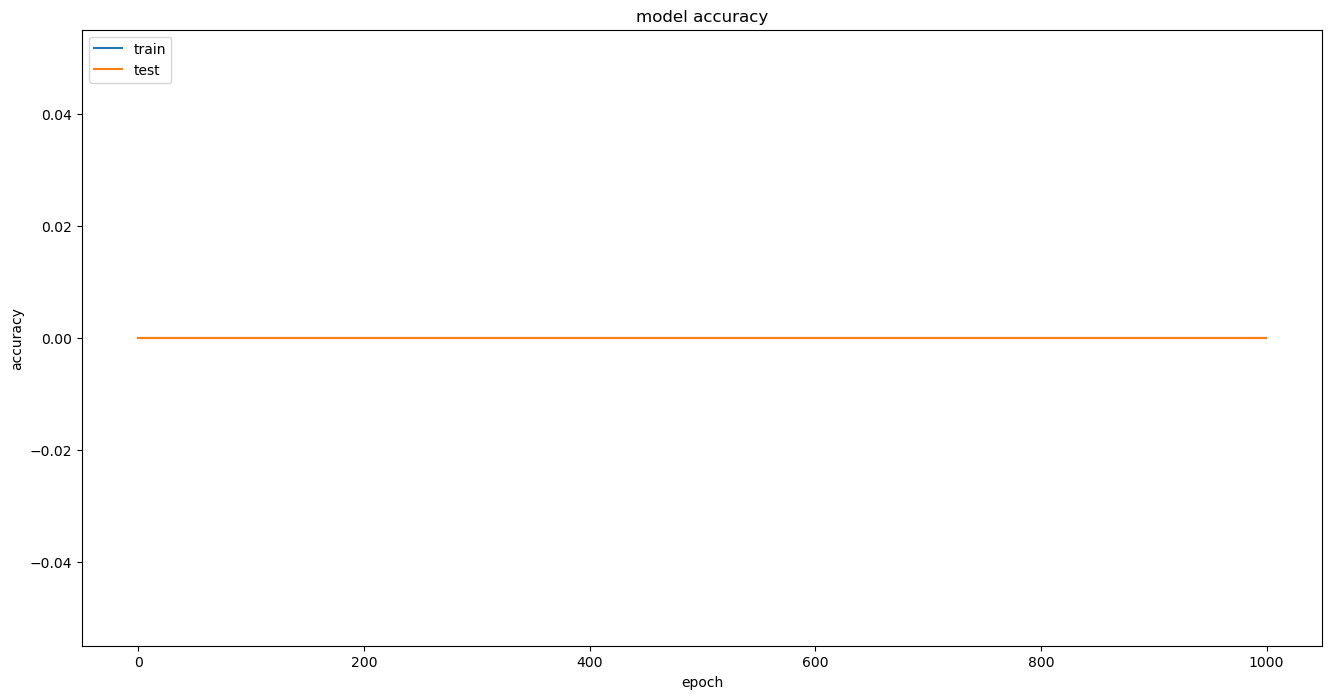

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

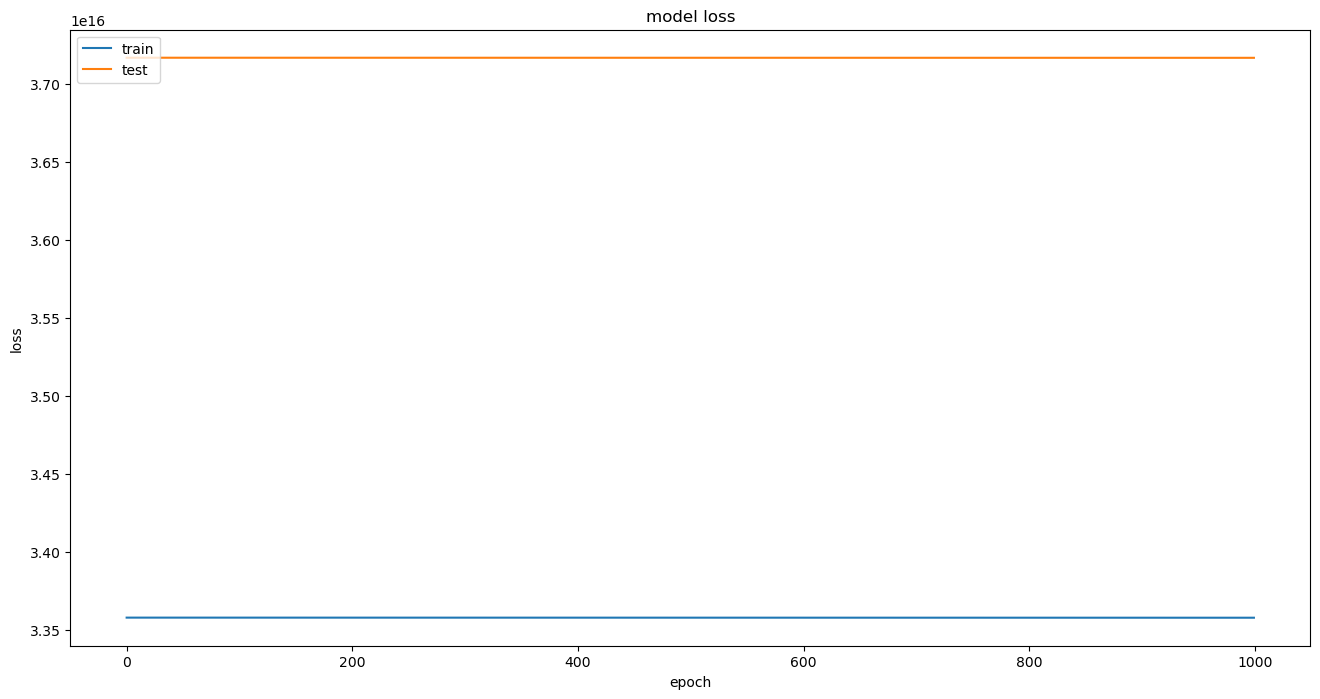

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
y_pred = model.predict(X_test)

5/5 [==============================] - 3s 5ms/step


In [35]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2.42229077e+03 5.04971220e+07]
 [2.42229077e+03 7.99997300e+07]
 [2.42229077e+03 2.66045810e+07]
 [2.42229077e+03 2.58185510e+07]
 [2.42229077e+03 9.18297020e+07]
 [2.42229077e+03 2.75651570e+07]
 [2.42229077e+03 1.24309047e+08]
 [2.42229077e+03 4.32402300e+07]
 [2.42229077e+03 1.15019220e+08]
 [2.42229077e+03 9.96694480e+07]
 [2.42229077e+03 6.28812730e+07]
 [2.42229077e+03 3.38102064e+08]
 [2.42229077e+03 2.15320288e+08]
 [2.42229077e+03 1.54079451e+08]
 [2.42229077e+03 1.22731570e+07]
 [2.42229077e+03 1.48680021e+08]
 [2.42229077e+03 9.50742570e+07]
 [2.42229077e+03 2.00908635e+08]
 [2.42229077e+03 5.87607970e+07]
 [2.42229077e+03 8.64116060e+07]
 [2.42229077e+03 9.29484790e+07]
 [2.42229077e+03 5.99037300e+07]
 [2.42229077e+03 6.28367400e+07]
 [2.42229077e+03 6.51788360e+07]
 [2.42229077e+03 5.96057510e+07]
 [2.42229077e+03 6.11006630e+07]
 [2.42229077e+03 1.28615608e+08]
 [2.42229077e+03 1.27907760e+07]
 [2.42229077e+03 6.04700980e+07]
 [2.42229077e+03 1.35122387e+08]
 [2.422290

In [36]:
y_pred=MIN_VALUE+(MAX_VALUE-MIN_VALUE)*y_pred

In [37]:
y_pred

array([[58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [58630.24],
       [5863

In [38]:
y_test=MIN_VALUE+(MAX_VALUE-MIN_VALUE)*y_test

In [39]:
y_test

array([1.22203036e+09, 1.93599348e+09, 6.43830871e+08, 6.24808945e+08,
       2.22227880e+09, 6.67076810e+08, 3.00827895e+09, 1.04641358e+09,
       2.78346513e+09, 2.41200065e+09, 1.52172682e+09, 8.18206996e+09,
       5.21075098e+09, 3.72872272e+09, 2.97010410e+08, 3.59805652e+09,
       2.30079703e+09, 4.86198898e+09, 1.42201130e+09, 2.09116088e+09,
       2.24935320e+09, 1.44967028e+09, 1.52064912e+09, 1.57732784e+09,
       1.44245918e+09, 1.47863606e+09, 3.11249772e+09, 3.09536790e+08,
       1.46337638e+09, 3.26996178e+09, 8.48578916e+08, 4.73943713e+09,
       1.12111803e+09, 5.63974477e+08, 7.07500427e+09, 4.37021323e+09,
       2.36890062e+09, 8.19088917e+08, 3.28053359e+09, 2.04761702e+09,
       1.47827990e+09, 9.67873977e+08, 2.43200875e+09, 2.30267785e+09,
       3.55399004e+09, 6.19399945e+09, 2.09948640e+09, 6.71037600e+08,
       1.82982745e+09, 2.58374687e+09, 2.32125944e+09, 4.17279043e+09,
       2.10634042e+09, 1.00635849e+09, 1.41057837e+10, 2.13608803e+09,
      

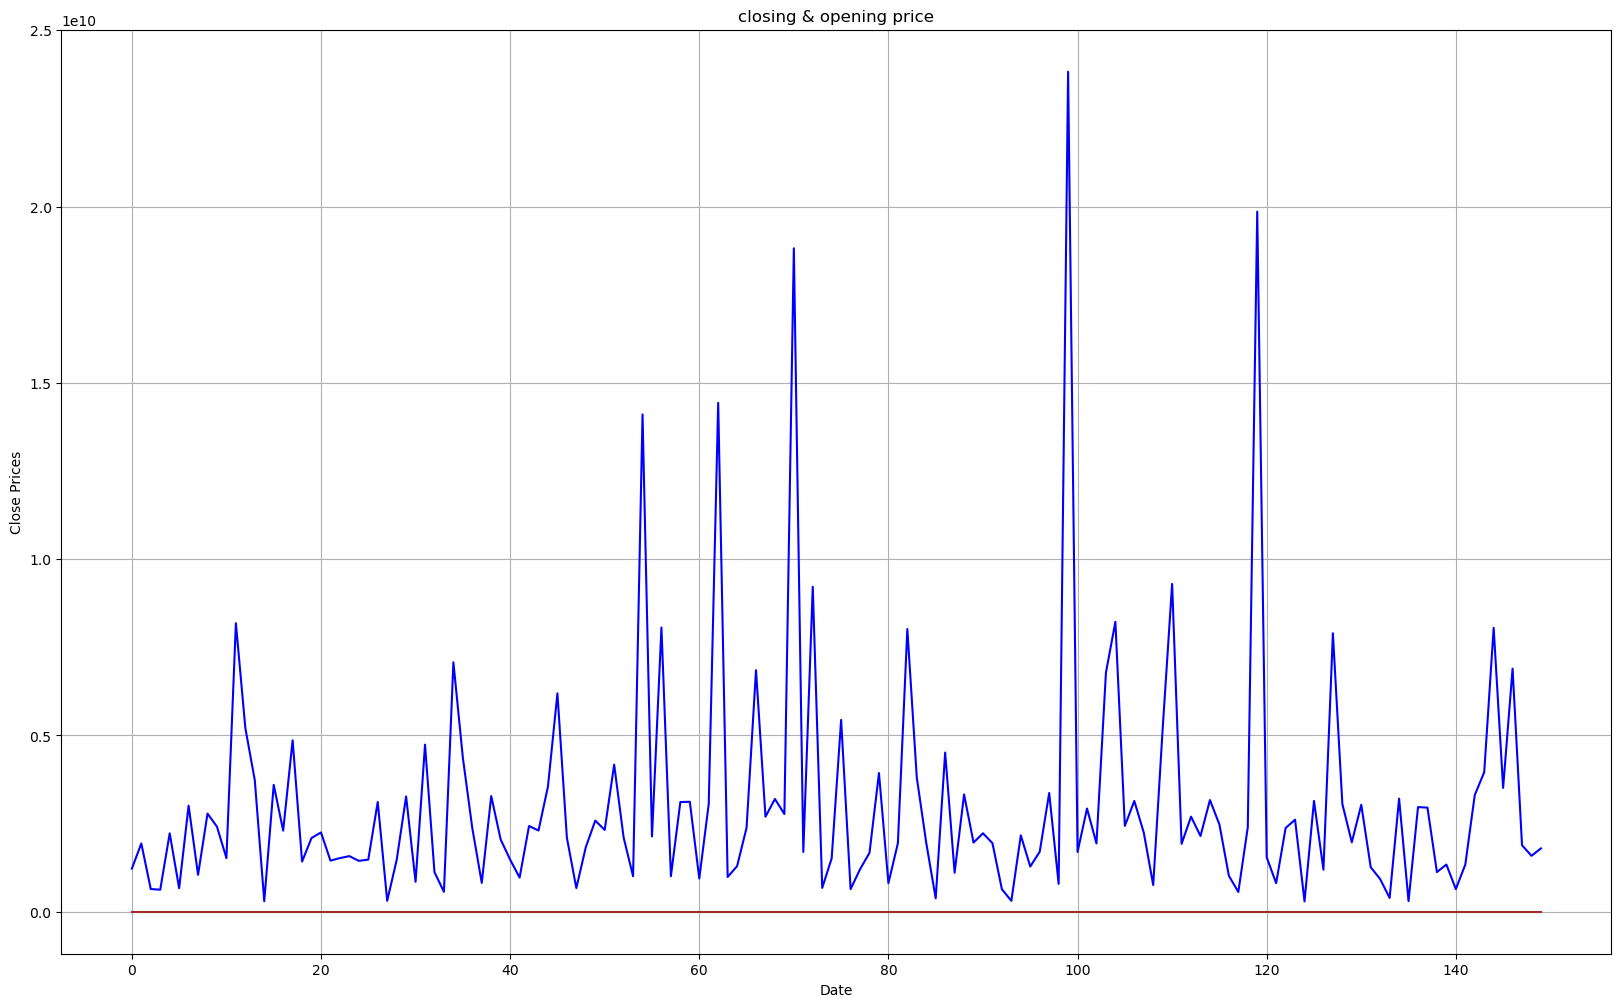

In [40]:
plt.figure(figsize=(20,12))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
#plt.plot(dataset['Close'])
plt.plot(y_pred, color="brown")
plt.plot(y_test, color="Blue")
plt.title('closing & opening price')
plt.show()

In [41]:
mse = mean_squared_error(y_pred,y_test)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_pred,y_test)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_pred, y_test))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_test - y_pred)/np.abs(y_test))
print('MAPE: '+str(mape))

MSE: 2.1767038531322237e+19
MAE: 3105715929.699052
RMSE: 4665515891.230276
MAPE: 0.9999600385520132


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [43]:
threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)
y_true_binary = np.where(y_test > threshold, 1, 0)

In [44]:
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)

In [45]:
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score: {:.2%}".format(f1))

Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%
